# TTUR example code

* The objective ( obj ) is $f(x,y) = (1+x^2) \cdot (100-y^2)$ where the derivative with respect to x is $ f_x = 2x\cdot(100-y^2)$ and with respect to y is $ f_y = -2y\cdot(1+x^2)$.

* The objective fulfills assumption A4 from the TTUR-paper. 

* It has a sattle point at $(x,y)^T = (0,0)^T$. The gradient at the sattle point is the zero vector, the function value at the sattle point is $f(0,0) = 100$.

* The norm $(x^2 + y^2)^{\frac{1}{2}}$ measures the distance of the parameter vector to the sattle point. We set a base learning rate (base_lr) and obtain the x-learning rate ( lr_x ) and the y-learning rate ( lr_y ) by scaling the base learning rate.

* On top of the gradient we add Gaussian noise with standard deviation sigma in order to simulate a stochastic gradient.

* We plot the objective (should converge to 100), the norm over time (should converge to 0) and the x-y phase diagram (should converge to (0,0)).     
    * The first line shows one-time scale learning, which usually diverges and has large fluctuations. 
    * The second line shows one-time scale with smaller learning rate, which usually converges, but slower than the TTUR in the next line (see norm). A small learning rate leads to convergence in this simple example but doesn't guarantee convergence in the general case. 
    * The third line shows TTUR with the x-update slowed down, which usually converges fast. 
    * The fourth line shows TTUR with the y-update slowed down, which is still more stable than the one-time scale update.


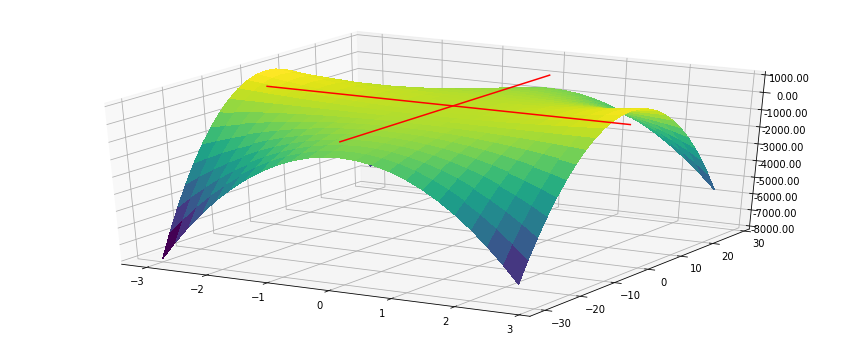

In [72]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#d-plots-in-3d

'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(15,6))
ax = fig.gca(projection='3d')

# Make data.
x_lim = [-3.0, 3.0]
y_lim = [i * 10.0 for i in x_lim]
x = np.arange(x_lim[0], x_lim[1], 0.25)
y = np.arange(y_lim[0], y_lim[1], 0.25 * 10.0)
X, Y = np.meshgrid(x, y)
Z = (1 + X**2) * (100 - Y**2)

# Plot the surface.
cmap=[cm.plasma, cm.viridis]
surf = ax.plot_surface(X, Y, Z, cmap=cmap[1],
                       linewidth=0, antialiased=False)

# Lines
# Saddle point at 0,0,100 for f = (1 + X**2) * (100 - Y**2)
x_zeros = np.zeros(len(x))
y_zeros = np.zeros(len(y))
zx_saddle = np.ones(len(x)) * 100
zy_saddle = np.ones(len(y)) * 100

ax.plot(x, y_zeros, zx_saddle, color="red")
ax.plot(x_zeros, y, zy_saddle, color="red")

# Customize the z axis.
#ax.set_zlim(-5000.01, 500.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

fig = plt.gcf()
plt.show()
fig.savefig("toyfunc3d.pdf", bbox_inches='tight')

In [89]:
import numpy as np

def run(lr_x, lr_y, n_iter, sigma):
    x = 0.5 #.509124898
    y = -0.4 #-.402918798624
    lrx_hist = []
    lry_hist = []
    x_hist = [x]
    y_hist = [y]
    obj_list = []
    norm_list = []
    for i in range(n_iter):
        x -= lr_x * (2*x*(100-y*y) + np.random.normal(scale=sigma))
        y += lr_y * (-2*y*(1+x*x) + np.random.normal(scale=sigma))

        norm = np.sqrt(x ** 2 + y ** 2)
        obj = (1+x*x)*(100-y*y)
        obj_list.append(obj)
        norm_list.append(norm)
        x_hist.append(x)
        y_hist.append(y)
    print (x, y, obj, norm)
    return x_hist, y_hist, obj_list, norm_list

In [90]:
n_iter = 5000
sigma = 1
base_lr = 0.01
res_otur_1 = run(base_lr, base_lr, n_iter, sigma)
res_otur_2 = run(base_lr/10, base_lr/10, n_iter, sigma)
res_ttur_1 = run(base_lr / 100, base_lr, n_iter, sigma)
res_ttur_2 = run(base_lr, base_lr / 100, n_iter, sigma)

res = [res_otur_1, res_otur_2, res_ttur_1, res_ttur_2]

0.7935282626580147 0.012823230456653944 162.96844238571578 0.793631866092
-0.0031984340496097412 -0.009700826780655883 100.00092889103405 0.0102145005065
-0.0005298009068054984 -0.0958138941740459 99.99084776400649 0.0958153589243
0.023539809577689468 -0.14057804533175197 100.03563912599105 0.142535291996


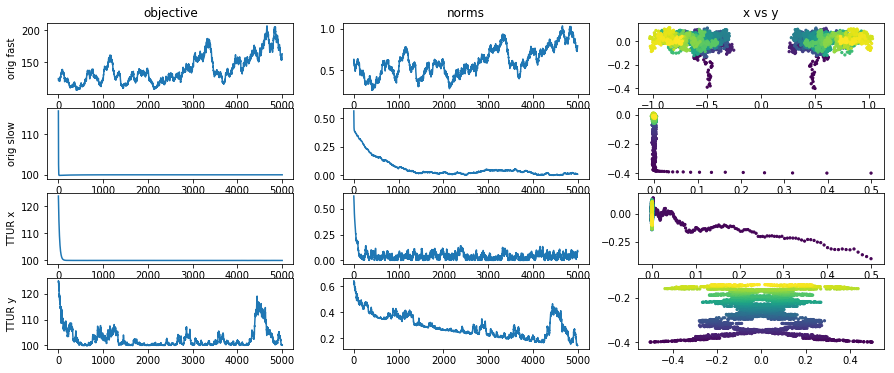

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3, figsize=(15, 6))
for i, r in enumerate(res):
    ax[i, 0].plot(r[2])
    ax[i, 1].plot(r[3])
    #ax[i, 2].plot(r[0], r[1], '->', alpha=0.1)
    ax[i, 2].scatter(r[0], r[1], s=5.0, alpha=1.0, c=np.arange(0, len(r[0]), 1), cmap=cm.viridis)

ax[0, 0].set_title("objective")
ax[0, 1].set_title("norms")
ax[0, 2].set_title("x vs y")
ax[0, 0].set_ylabel("orig fast")
ax[1, 0].set_ylabel("orig slow")
ax[2, 0].set_ylabel("TTUR x")
ax[3, 0].set_ylabel("TTUR y")

fig.savefig("toyfunc3d_ttur.pdf", bbox_inches='tight')

fig


In [92]:
plt.close('all')